In [83]:
library(readxl)
manabiAntes = read_excel("con-res-antes-manabi.xlsx")
manabiDespues = read_excel("con-res-desp-manabif.xlsx")

In [84]:
head(manabiAntes)

fecha,torres_activas,CantidadClientes,porc-por-dia,suma-num-por-dia,sum-por-todo,porc-por-todo,prom-por-dia,porc-prom-por-dia,ln-porc-prom-por-dia,prom-por-todo,pob-manabi-2016,factor-prom-divido-pob-manabi,ln-factor-prom-divido-pob-manabi,factor,ind.con,ind.res
2016-04-15 00:00:00,18828,39629,0.02209400,852177,2436485,0.007727526,35507.38,0.5302560,-0.6343953,25380.052083333332,1510375,0.012216463,-4.404971,0.57,0.4753118,0.012465778
2016-04-15 01:00:00,12715,24680,0.01492061,NA,NA,0.005218583,NA,0.3580946,-1.0269580,prom x todo,NA,0.010233267,-4.582111,0.58,0.4337416,0.010442109
2016-04-15 02:00:00,10564,20347,0.01239649,NA,NA,0.004335754,NA,0.2975157,-1.2122884,NA,NA,0.009106979,-4.698714,0.59,0.4173404,0.009292836
2016-04-15 03:00:00,10152,20173,0.01191302,NA,NA,0.004166658,NA,0.2859124,-1.2520697,NA,NA,0.008477004,-4.770398,0.60,0.4166181,0.008650004
2016-04-15 04:00:00,10629,20121,0.01247276,NA,NA,0.004362432,NA,0.2993463,-1.2061543,NA,NA,0.008160919,-4.808398,0.61,0.4164012,0.008327468
2016-04-15 05:00:00,13349,24179,0.01566459,NA,NA,0.005478794,NA,0.3759501,-0.9782989,NA,NA,0.008244339,-4.798229,0.62,0.4319843,0.008412591


In [85]:
str(manabiAntes)

Classes 'tbl_df', 'tbl' and 'data.frame':	96 obs. of  17 variables:
 $ fecha                           : POSIXct, format: "2016-04-15 00:00:00" "2016-04-15 01:00:00" ...
 $ torres_activas                  : num  18828 12715 10564 10152 10629 ...
 $ CantidadClientes                : num  39629 24680 20347 20173 20121 ...
 $ porc-por-dia                    : num  0.0221 0.0149 0.0124 0.0119 0.0125 ...
 $ suma-num-por-dia                : num  852177 NA NA NA NA ...
 $ sum-por-todo                    : num  2436485 NA NA NA NA ...
 $ porc-por-todo                   : num  0.00773 0.00522 0.00434 0.00417 0.00436 ...
 $ prom-por-dia                    : num  35507 NA NA NA NA ...
 $ porc-prom-por-dia               : num  0.53 0.358 0.298 0.286 0.299 ...
 $ ln-porc-prom-por-dia            : num  -0.634 -1.027 -1.212 -1.252 -1.206 ...
 $ prom-por-todo                   : chr  "25380.052083333332" "prom x todo" NA NA ...
 $ pob-manabi-2016                 : num  1510375 NA NA NA NA ...
 $ fact

In [86]:
manabiAntes$fecha> as.POSIXlt("2008-01-01 02:30")

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[91] TRUE TRUE TRUE TRUE TRUE TRUE

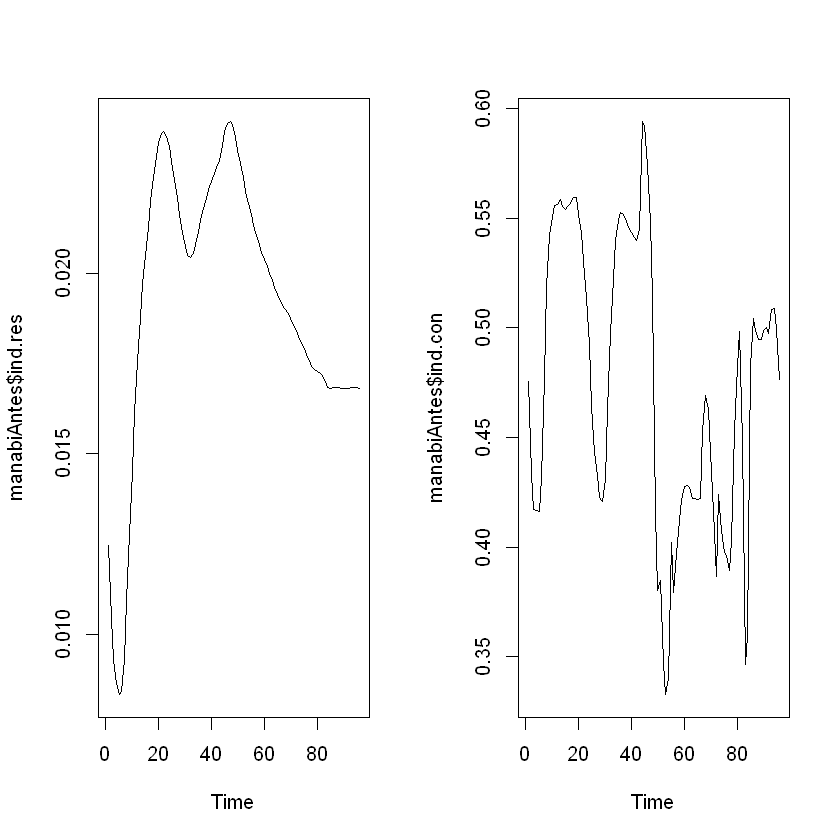

In [87]:
par(mfrow=c(1, 2))
plot.ts(manabiAntes$ind.res)
plot.ts(manabiAntes$ind.con)


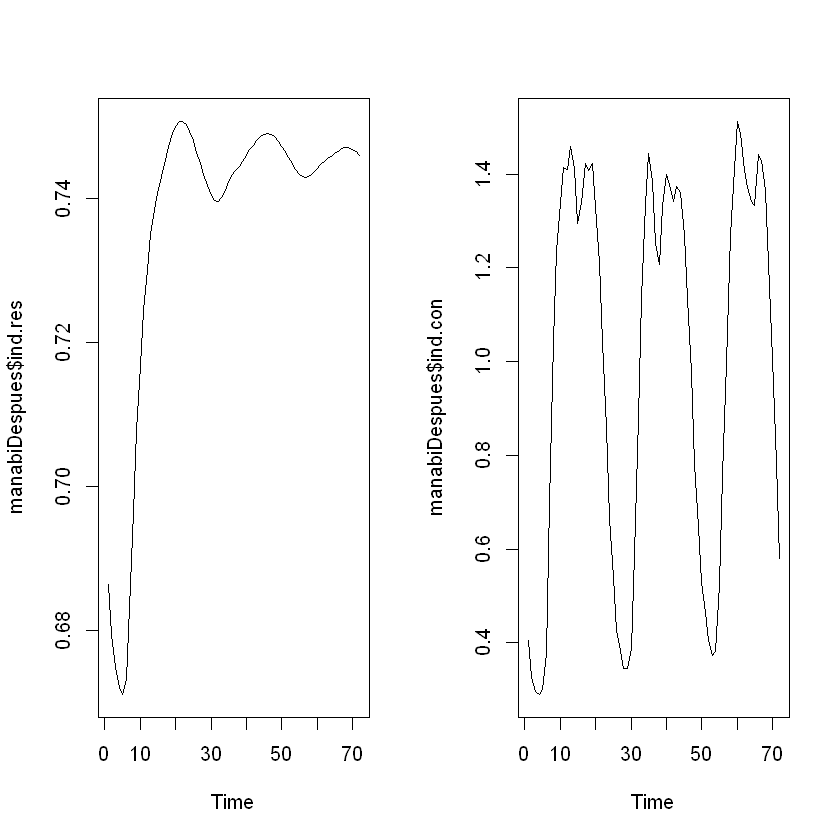

In [88]:
par(mfrow=c(1, 2))
plot.ts(manabiDespues$ind.res)
plot.ts(manabiDespues$ind.con)

In [89]:
# creo variable para cada hora del dia
manabiDespues$estacionalidad = rep(seq(1, 24), times = 3)

In [90]:
head(manabiDespues)

fecha,torre_act,CantidadClientes,pob.manabi.2016,ind.res,ind.con,prom-.client,estacionalidad
2016-07-15 00:00:00,17399,33214,1510375,0.6862706,0.4060311,81801.62,1
2016-07-15 01:00:00,14130,26726,NA,0.6793369,0.3267172,NA,2
2016-07-15 02:00:00,12759,24267,NA,0.6747221,0.2966567,NA,3
2016-07-15 03:00:00,12502,23674,NA,0.6719785,0.2894075,NA,4
2016-07-15 04:00:00,13224,24497,NA,0.6710079,0.2994684,NA,5
2016-07-15 05:00:00,16581,30806,NA,0.6731323,0.3765940,NA,6


In [91]:
library(dummies)
manabiDespues$estacionalidadh = rep(seq(1, 24), times = 3)
manabiDespues <- dummy.data.frame (as.data.frame(manabiDespues), names = c ("estacionalidadh"), sep = "_")

In [92]:
head(manabiDespues)

fecha,torre_act,CantidadClientes,pob.manabi.2016,ind.res,ind.con,prom-.client,estacionalidad,estacionalidadh_1,estacionalidadh_2,...,estacionalidadh_15,estacionalidadh_16,estacionalidadh_17,estacionalidadh_18,estacionalidadh_19,estacionalidadh_20,estacionalidadh_21,estacionalidadh_22,estacionalidadh_23,estacionalidadh_24
2016-07-15 00:00:00,17399,33214,1510375,0.6862706,0.4060311,81801.62,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2016-07-15 01:00:00,14130,26726,NA,0.6793369,0.3267172,NA,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2016-07-15 02:00:00,12759,24267,NA,0.6747221,0.2966567,NA,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-07-15 03:00:00,12502,23674,NA,0.6719785,0.2894075,NA,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-07-15 04:00:00,13224,24497,NA,0.6710079,0.2994684,NA,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-07-15 05:00:00,16581,30806,NA,0.6731323,0.3765940,NA,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
myvars <- names(manabiDespues) %in% c("fecha","torre_act","CantidadClientes","pob.manabi.2016","ind.res","estacionalidad",
                                      "prom-.client")
dataIndCon = manabiDespues[!myvars]

In [94]:
modeloEliminoEstacionalidad =lm(ind.con~estacionalidadh_1+estacionalidadh_2+estacionalidadh_3+estacionalidadh_4+estacionalidadh_5+estacionalidadh_6+
  estacionalidadh_7+estacionalidadh_8+estacionalidadh_9+estacionalidadh_10+estacionalidadh_11+estacionalidadh_12+
  estacionalidadh_13+ estacionalidadh_14+estacionalidadh_15+estacionalidadh_16+estacionalidadh_17+estacionalidadh_18+
  estacionalidadh_19+estacionalidadh_20+estacionalidadh_21+estacionalidadh_22+estacionalidadh_23, 
   data =dataIndCon )

In [95]:
summary(modeloEliminoEstacionalidad)


Call:
lm(formula = ind.con ~ estacionalidadh_1 + estacionalidadh_2 + 
    estacionalidadh_3 + estacionalidadh_4 + estacionalidadh_5 + 
    estacionalidadh_6 + estacionalidadh_7 + estacionalidadh_8 + 
    estacionalidadh_9 + estacionalidadh_10 + estacionalidadh_11 + 
    estacionalidadh_12 + estacionalidadh_13 + estacionalidadh_14 + 
    estacionalidadh_15 + estacionalidadh_16 + estacionalidadh_17 + 
    estacionalidadh_18 + estacionalidadh_19 + estacionalidadh_20 + 
    estacionalidadh_21 + estacionalidadh_22 + estacionalidadh_23, 
    data = dataIndCon)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147864 -0.035579  0.000171  0.038774  0.149745 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.67496    0.04569  14.773  < 2e-16 ***
estacionalidadh_1  -0.14420    0.06461  -2.232 0.030330 *  
estacionalidadh_2  -0.24738    0.06461  -3.829 0.000373 ***
estacionalidadh_3  -0.29283    0.06461  -4.532 3.89e-05 ***
estaciona

In [96]:
prediccionSinEstac = fitted(modeloEliminoEstacionalidad)
residuosSinEstac = residuals(modeloEliminoEstacionalidad)

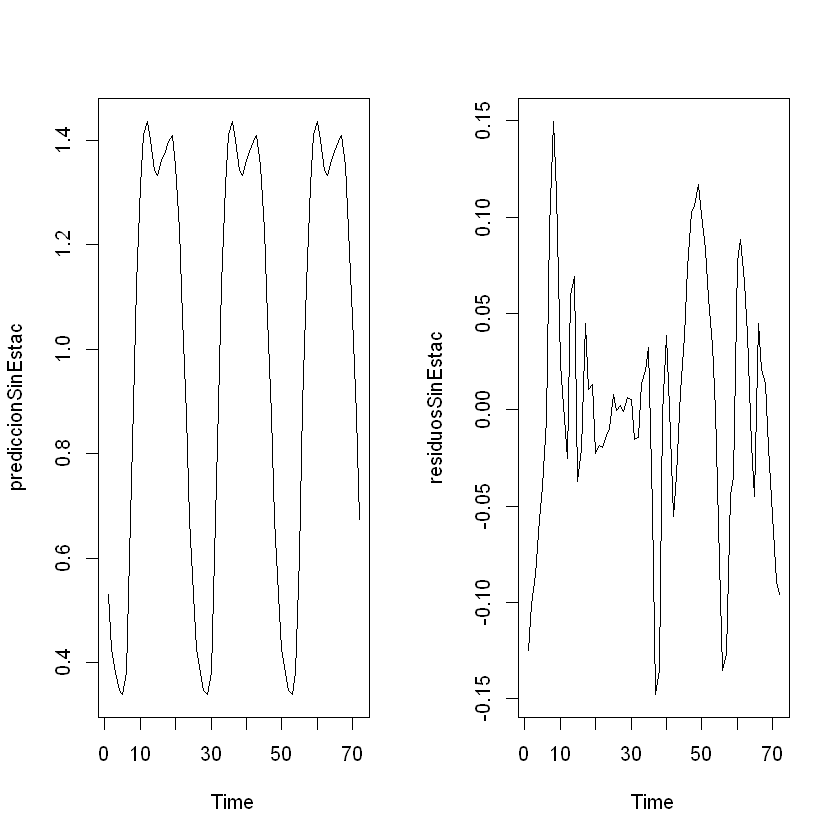

In [97]:
par(mfrow=c(1, 2))
plot.ts(prediccionSinEstac)
plot.ts(residuosSinEstac)

In [98]:
dataIndCon$tend = as.numeric(seq(1:nrow(dataIndCon)))

In [99]:
modeloEliminoEstacionalidadTend =lm(ind.con~estacionalidadh_1+estacionalidadh_2+estacionalidadh_3+estacionalidadh_4+estacionalidadh_5+estacionalidadh_6+
  estacionalidadh_7+estacionalidadh_8+estacionalidadh_9+estacionalidadh_10+estacionalidadh_11+estacionalidadh_12+
  estacionalidadh_13+ estacionalidadh_14+estacionalidadh_15+estacionalidadh_16+estacionalidadh_17+estacionalidadh_18+
  estacionalidadh_19+estacionalidadh_20+estacionalidadh_21+estacionalidadh_22+estacionalidadh_23, data =dataIndCon )

In [100]:
summary(modeloEliminoEstacionalidadTend )


Call:
lm(formula = ind.con ~ estacionalidadh_1 + estacionalidadh_2 + 
    estacionalidadh_3 + estacionalidadh_4 + estacionalidadh_5 + 
    estacionalidadh_6 + estacionalidadh_7 + estacionalidadh_8 + 
    estacionalidadh_9 + estacionalidadh_10 + estacionalidadh_11 + 
    estacionalidadh_12 + estacionalidadh_13 + estacionalidadh_14 + 
    estacionalidadh_15 + estacionalidadh_16 + estacionalidadh_17 + 
    estacionalidadh_18 + estacionalidadh_19 + estacionalidadh_20 + 
    estacionalidadh_21 + estacionalidadh_22 + estacionalidadh_23, 
    data = dataIndCon)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147864 -0.035579  0.000171  0.038774  0.149745 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.67496    0.04569  14.773  < 2e-16 ***
estacionalidadh_1  -0.14420    0.06461  -2.232 0.030330 *  
estacionalidadh_2  -0.24738    0.06461  -3.829 0.000373 ***
estacionalidadh_3  -0.29283    0.06461  -4.532 3.89e-05 ***
estaciona

In [101]:
prediccionSinEstacTend = fitted(modeloEliminoEstacionalidadTend )
residuosSinEstacTend = residuals(modeloEliminoEstacionalidadTend )

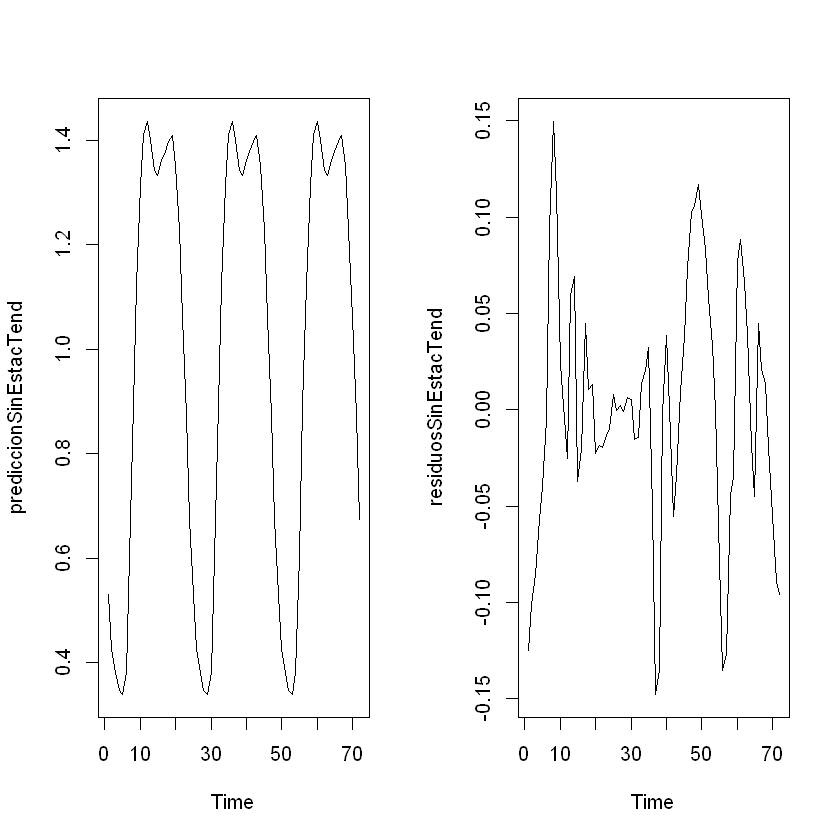

In [102]:
par(mfrow=c(1, 2))
plot.ts(prediccionSinEstacTend)
plot.ts(residuosSinEstacTend)

In [103]:
#install.packages("tseries")
# adf hipótesis nula de que una serie contiene una raíz unitaria
#  KPSS utiliza la hipótesis nula de que la serie es estacionaria.

library(tseries)
adf.test(residuosSinEstacTend, alternative="stationary")

# test de pperron
# hipótesis nula que x: tiene una raíz unitaria frente a una alternativa estacionaria
pp.test(residuosSinEstacTend, alternative="stationary")

# La hipótesis nula para la prueba es que los datos son estacionarios.
kpss.test(residuosSinEstacTend, null = c("Level"))


	Augmented Dickey-Fuller Test

data:  residuosSinEstacTend
Dickey-Fuller = -3.6403, Lag order = 4, p-value = 0.03617
alternative hypothesis: stationary



	Phillips-Perron Unit Root Test

data:  residuosSinEstacTend
Dickey-Fuller Z(alpha) = -21.687, Truncation lag parameter = 3, p-value
= 0.03616
alternative hypothesis: stationary


Warning message in kpss.test(residuosSinEstacTend, null = c("Level")):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  residuosSinEstacTend
KPSS Level = 0.074052, Truncation lag parameter = 1, p-value = 0.1


In [104]:
# test de dickey-fuller
adf.test(diff(residuosSinEstacTend), alternative="stationary",k=0)

# test de pperron
pp.test(diff(residuosSinEstacTend), alternative="stationary")

# La hipótesis nula para la prueba es que los datos son estacionarios.
kpss.test(diff(residuosSinEstacTend), null = c("Level"))


Warning message in adf.test(diff(residuosSinEstacTend), alternative = "stationary", :
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(residuosSinEstacTend)
Dickey-Fuller = -6.2813, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


Warning message in pp.test(diff(residuosSinEstacTend), alternative = "stationary"):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  diff(residuosSinEstacTend)
Dickey-Fuller Z(alpha) = -43.585, Truncation lag parameter = 3, p-value
= 0.01
alternative hypothesis: stationary


Warning message in kpss.test(diff(residuosSinEstacTend), null = c("Level")):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  diff(residuosSinEstacTend)
KPSS Level = 0.087951, Truncation lag parameter = 1, p-value = 0.1


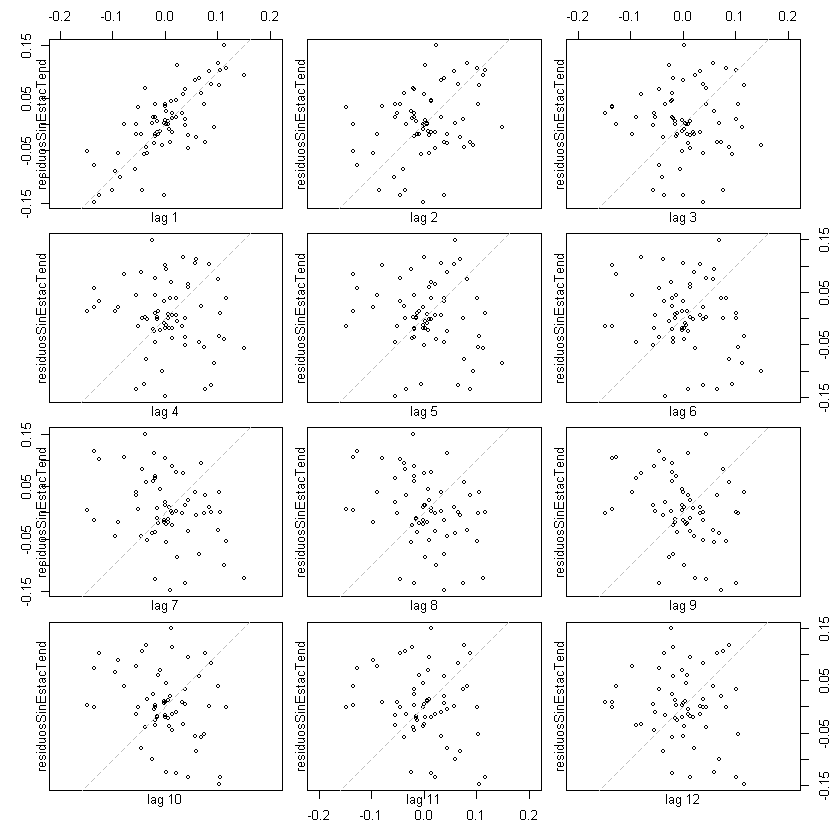

In [105]:
lag.plot(residuosSinEstacTend,lags=12,do.lines=F)

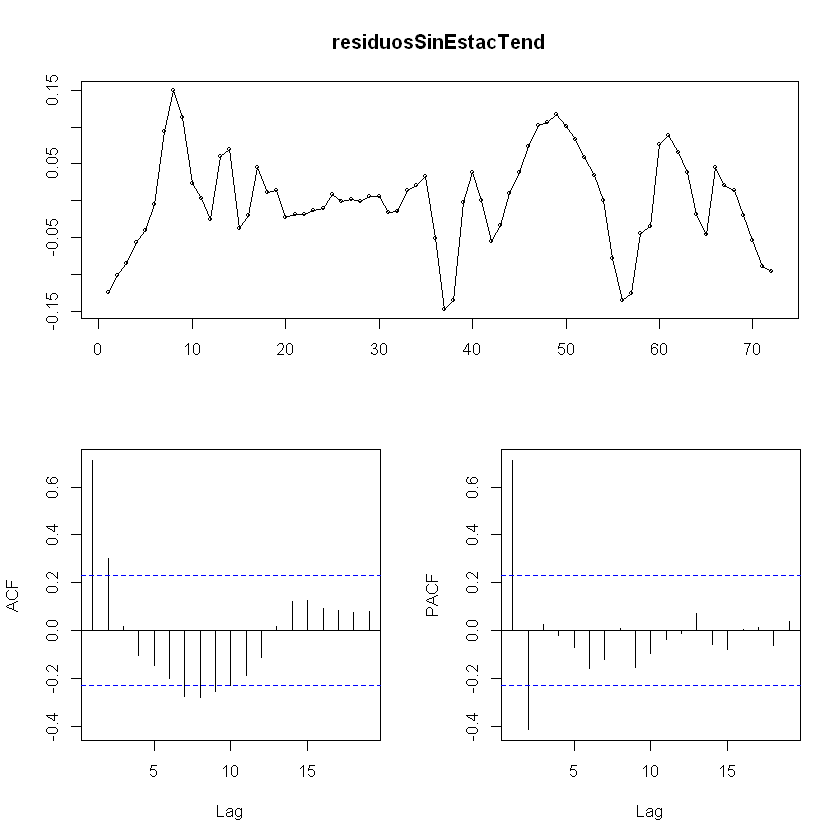

In [106]:
library(forecast)
tsdisplay(residuosSinEstacTend)

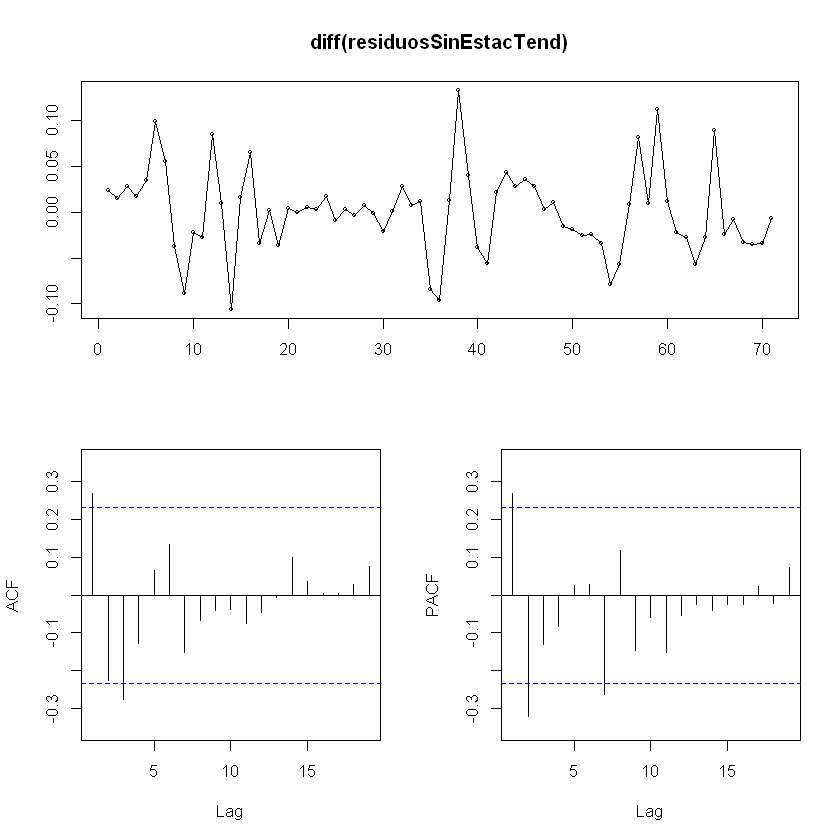

In [107]:
#install.packages("forecast")
tsdisplay(diff(residuosSinEstacTend))


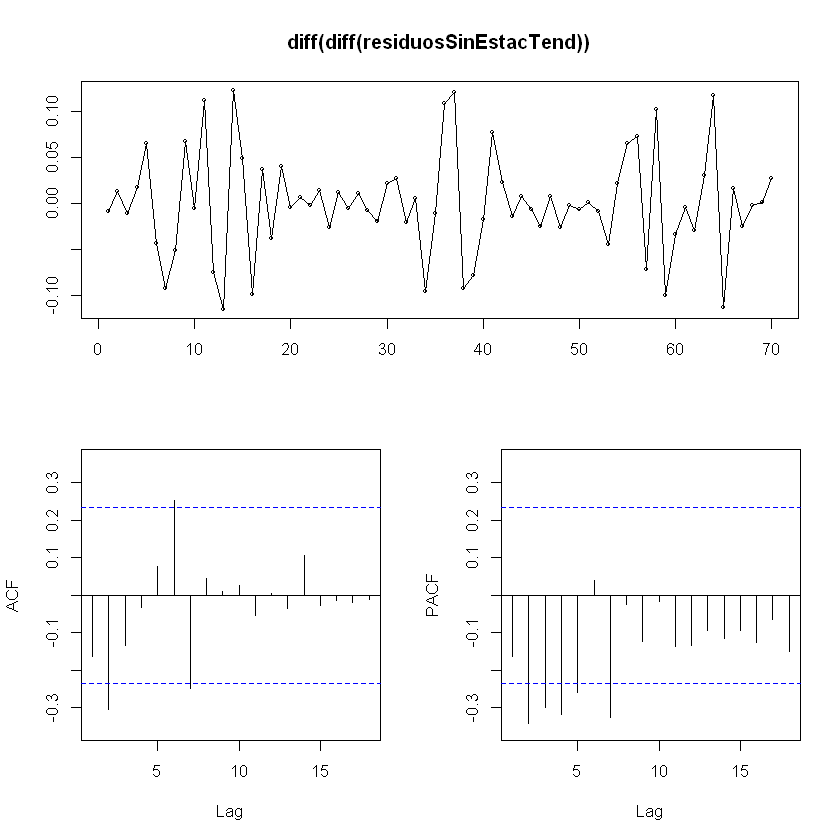

In [108]:
tsdisplay(diff(diff(residuosSinEstacTend)))

In [109]:
# indice de resiliencia
# creo tendencia cuadrada
dataIndCon$tend2 = (dataIndCon$tend)^2
dataIndCon$tend3 = (dataIndCon$tend)^3
dataIndCon$ind.res = manabiDespues$ind.res


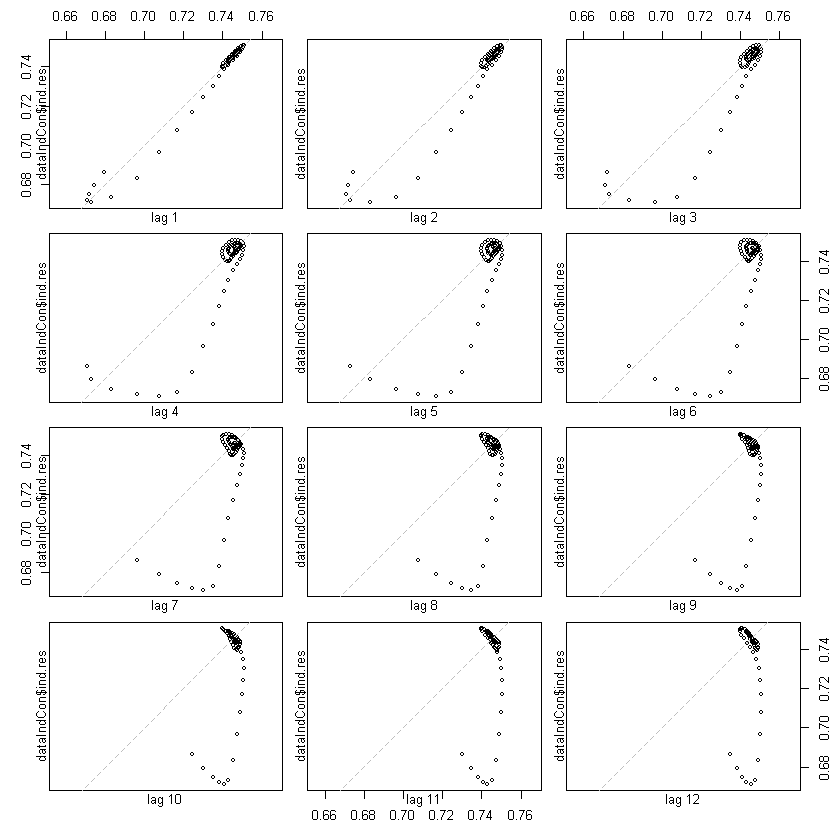

In [110]:
lag.plot(dataIndCon$ind.res,lags=12,do.lines=F)

In [111]:
modeloEliminoEstacionalidadTendRes =lm(ind.res~+estacionalidadh_4+estacionalidadh_5+estacionalidadh_6+
           estacionalidadh_7+estacionalidadh_8+
          tend+tend2+tend3, data =dataIndCon )

In [112]:
summary(modeloEliminoEstacionalidadTendRes)


Call:
lm(formula = ind.res ~ +estacionalidadh_4 + estacionalidadh_5 + 
    estacionalidadh_6 + estacionalidadh_7 + estacionalidadh_8 + 
    tend + tend2 + tend3, data = dataIndCon)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0131585 -0.0042356  0.0005321  0.0036000  0.0141889 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.658e-01  3.579e-03 186.054  < 2e-16 ***
estacionalidadh_4 -8.335e-03  4.095e-03  -2.036  0.04601 *  
estacionalidadh_5 -1.119e-02  4.083e-03  -2.740  0.00797 ** 
estacionalidadh_6 -1.282e-02  4.073e-03  -3.148  0.00251 ** 
estacionalidadh_7 -1.145e-02  4.064e-03  -2.818  0.00646 ** 
estacionalidadh_8 -8.610e-03  4.058e-03  -2.122  0.03779 *  
tend               6.408e-03  4.082e-04  15.699  < 2e-16 ***
tend2             -1.499e-04  1.294e-05 -11.584  < 2e-16 ***
tend3              1.078e-06  1.166e-07   9.247 2.42e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R

In [113]:
prediccionSinEstacTendRes = fitted(modeloEliminoEstacionalidadTendRes )
residuosSinEstacTendRes = residuals(modeloEliminoEstacionalidadTendRes )

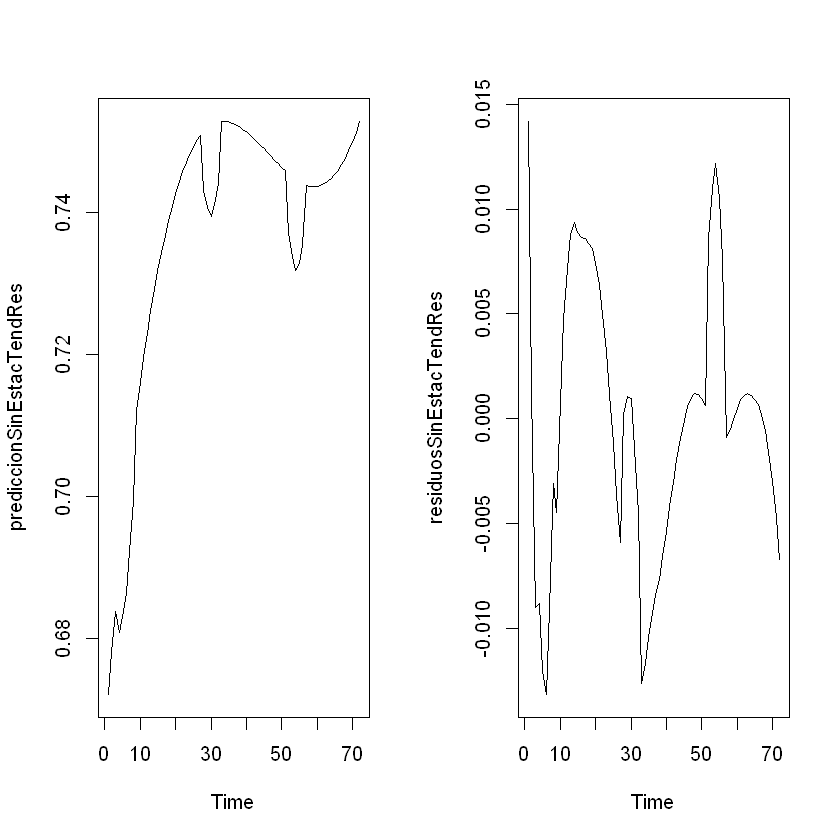

In [114]:
par(mfrow=c(1, 2))
plot.ts(prediccionSinEstacTendRes)
plot.ts(residuosSinEstacTendRes)

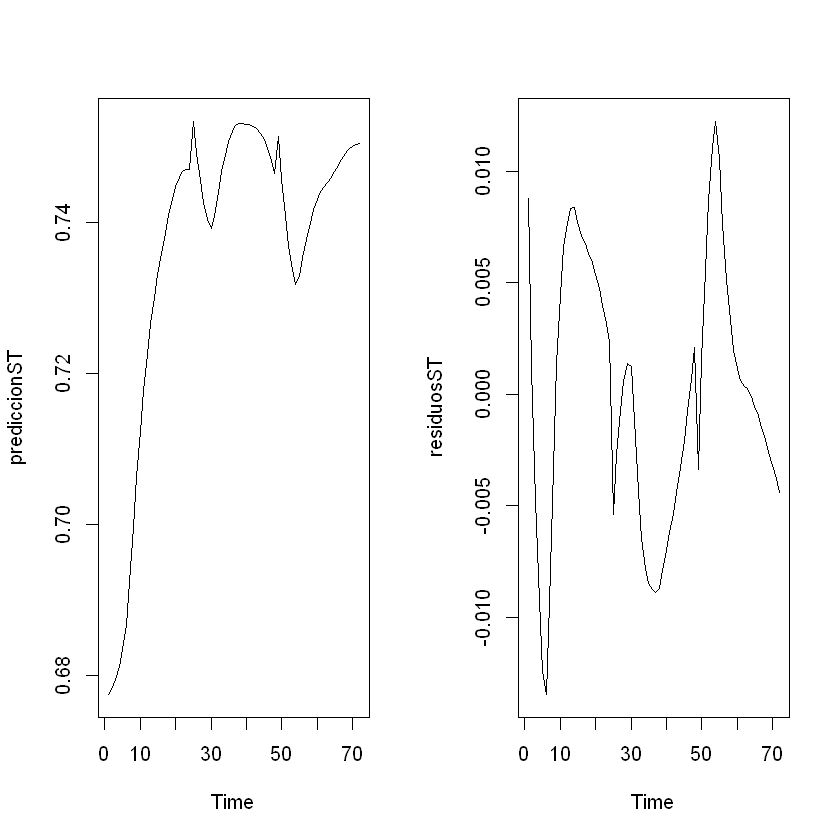

In [115]:
modelosolotend =lm(ind.res~+estacionalidadh_1+estacionalidadh_2+estacionalidadh_3+estacionalidadh_4+
                   estacionalidadh_5+estacionalidadh_6+estacionalidadh_7+estacionalidadh_8+
                   estacionalidadh_9+estacionalidadh_10+estacionalidadh_11+estacionalidadh_12+
                   estacionalidadh_13+estacionalidadh_14+estacionalidadh_15+
                   estacionalidadh_16+estacionalidadh_17+estacionalidadh_18+
                   estacionalidadh_19+estacionalidadh_20+estacionalidadh_21+
                   estacionalidadh_22+estacionalidadh_23+tend+tend2+tend3, data =dataIndCon )
prediccionST = fitted(modelosolotend)
residuosST = residuals(modelosolotend)

par(mfrow=c(1, 2))
plot.ts(prediccionST)
plot.ts(residuosST)

In [116]:
adf.test(residuosSinEstacTendRes, alternative="stationary")

# test de pperron
pp.test(residuosSinEstacTendRes, alternative="stationary")

# La hipótesis nula para la prueba es que los datos son estacionarios.
kpss.test(residuosSinEstacTendRes, null = c("Level"))


	Augmented Dickey-Fuller Test

data:  residuosSinEstacTendRes
Dickey-Fuller = -2.7474, Lag order = 4, p-value = 0.271
alternative hypothesis: stationary



	Phillips-Perron Unit Root Test

data:  residuosSinEstacTendRes
Dickey-Fuller Z(alpha) = -18.475, Truncation lag parameter = 3, p-value
= 0.07761
alternative hypothesis: stationary


Warning message in kpss.test(residuosSinEstacTendRes, null = c("Level")):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  residuosSinEstacTendRes
KPSS Level = 0.16973, Truncation lag parameter = 1, p-value = 0.1


In [117]:
# test de dickey-fuller
adf.test(diff(residuosSinEstacTendRes), alternative="stationary")

# test de pperron
pp.test(diff(residuosSinEstacTendRes), alternative="stationary")

# La hipótesis nula para la prueba es que los datos son estacionarios.
kpss.test(diff(residuosSinEstacTendRes), null = c("Level"))


Warning message in adf.test(diff(residuosSinEstacTendRes), alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(residuosSinEstacTendRes)
Dickey-Fuller = -5.5487, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in pp.test(diff(residuosSinEstacTendRes), alternative = "stationary"):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  diff(residuosSinEstacTendRes)
Dickey-Fuller Z(alpha) = -38.31, Truncation lag parameter = 3, p-value
= 0.01
alternative hypothesis: stationary


Warning message in kpss.test(diff(residuosSinEstacTendRes), null = c("Level")):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  diff(residuosSinEstacTendRes)
KPSS Level = 0.094358, Truncation lag parameter = 1, p-value = 0.1


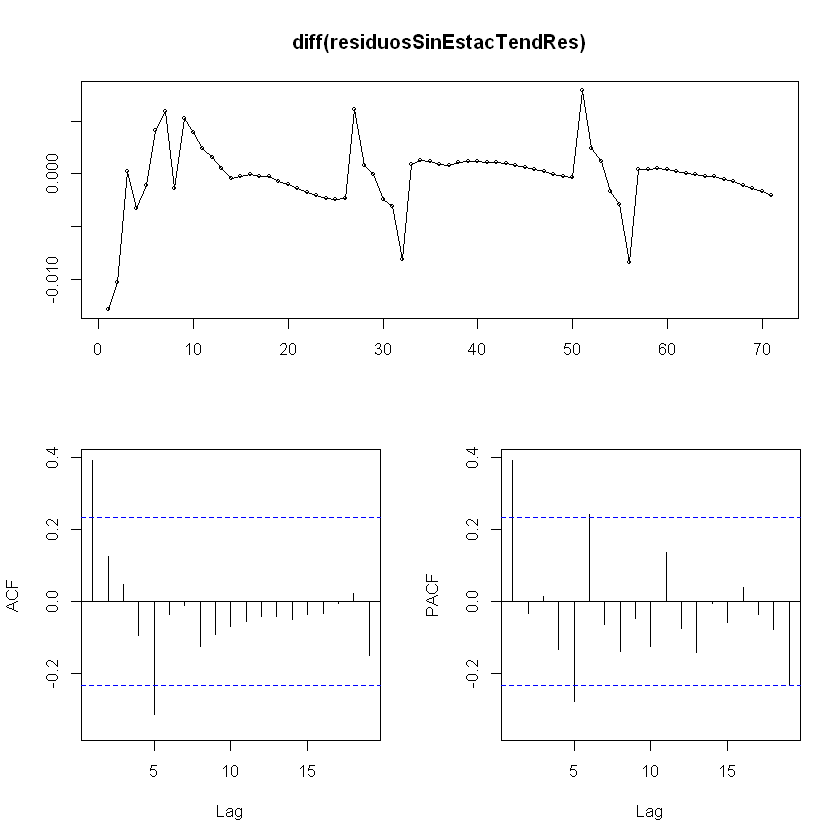

In [119]:
tsdisplay(diff(residuosSinEstacTendRes))

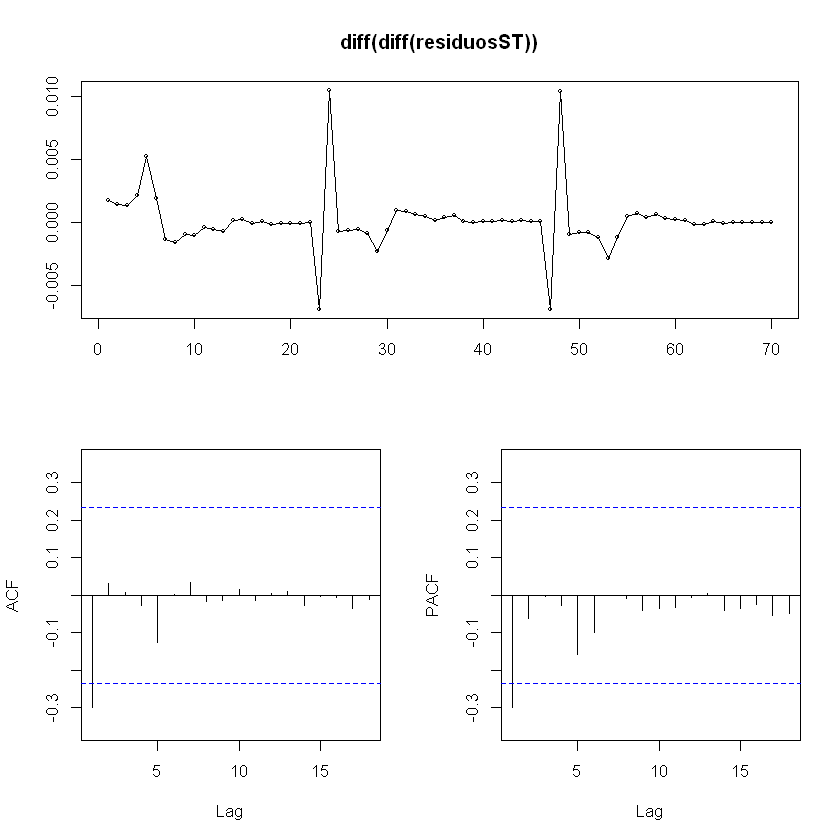

In [132]:
tsdisplay(diff(diff(residuosST)))

In [133]:
# series a usarse
# residuosST
# residuosSinEstacTendRes
ind.res.estac = diff(residuosST)
ind.con.estac = diff(residuosSinEstacTend)


In [134]:
# junto con solo series estacionarias
seriesEstac = cbind(ind.res.estac,ind.con.estac)
head(seriesEstac)

,ind.res.estac,ind.con.estac
2,-0.007639525,0.02386074
3,-0.005919445,0.01538919
4,-0.004488207,0.02831481
5,-0.003176125,0.01722731
6,-0.001041382,0.03473640
7,0.004142723,0.09927898


In [135]:
# selection criteria summary
library(vars)
VARselect(seriesEstac, lag.max=10, type="const")

,1,2,3,4,5,6,7,8,9,10
AIC(n),-1.864081e+01,-1.863938e+01,-1.854590e+01,-1.845497e+01,-1.835693e+01,-1.827122e+01,-1.832567e+01,-1.823860e+01,-1.814893e+01,-1.802961e+01
HQ(n),-1.855944e+01,-1.850377e+01,-1.835603e+01,-1.821086e+01,-1.805857e+01,-1.791862e+01,-1.791882e+01,-1.777750e+01,-1.763358e+01,-1.746002e+01
SC(n),-1.843318e+01,-1.829334e+01,-1.806144e+01,-1.783209e+01,-1.759563e+01,-1.737151e+01,-1.728754e+01,-1.706205e+01,-1.683396e+01,-1.657622e+01
FPE(n),8.025456e-09,8.041523e-09,8.840986e-09,9.704951e-09,1.074360e-08,1.176714e-08,1.122533e-08,1.236595e-08,1.369665e-08,1.567838e-08


In [136]:
#install.packages("vars")
#library(vars)
var.1 <- VAR(seriesEstac, lag.max=5, type = "const",ic="HQ")

In [137]:
#La matriz de correlación de residuos en la parte inferior presenta -0.10 como la correlación de residuos. 
#Es relativamente bajo e implica y1  y2 No tienen mucho impacto entre sí.
summary(var.1)


VAR Estimation Results:
Endogenous variables: ind.res.estac, ind.con.estac 
Deterministic variables: const 
Sample size: 70 
Log Likelihood: 457.054 
Roots of the characteristic polynomial:
0.389 0.389
Call:
VAR(y = seriesEstac, type = "const", lag.max = 5, ic = "HQ")


Estimation results for equation ind.res.estac: 
ind.res.estac = ind.res.estac.l1 + ind.con.estac.l1 + const 

                  Estimate Std. Error t value Pr(>|t|)    
ind.res.estac.l1 4.992e-01  9.571e-02   5.216 1.92e-06 ***
ind.con.estac.l1 6.563e-03  5.190e-03   1.265    0.210    
const            6.774e-06  2.400e-04   0.028    0.978    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.002003 on 67 degrees of freedom
Multiple R-Squared: 0.2972,	Adjusted R-squared: 0.2762 
F-statistic: 14.17 on 2 and 67 DF,  p-value: 7.386e-06 


Estimation results for equation ind.con.estac: 
ind.con.estac = ind.res.estac.l1 + ind.con.estac.l1 + const 

                   Estimate St

In [139]:
# using stargazer package to report results of VAR estimation
#install.packages("stargazer")
lmp <- var.1$varresult
library(stargazer)
stargazer(lmp$ind.res.estac, lmp$ind.con.estac, type="text", dep.var.labels.include=FALSE)


                                  Dependent variable:     
                              ----------------------------
                                    (1)           (2)     
----------------------------------------------------------
ind.res.estac.l1                 0.499***        -3.120   
                                  (0.096)       (2.134)   
                                                          
ind.con.estac.l1                   0.007        0.262**   
                                  (0.005)       (0.116)   
                                                          
const                             0.00001        -0.001   
                                 (0.0002)       (0.005)   
                                                          
----------------------------------------------------------
Observations                        70             70     
R2                                 0.297         0.101    
Adjusted R2                        0.276         0.074 

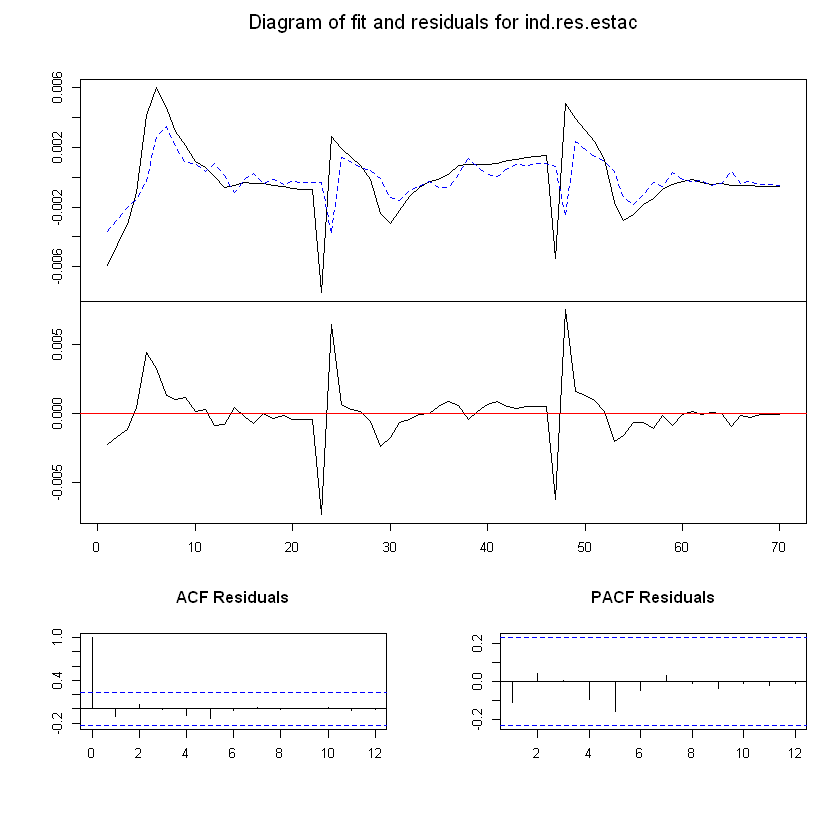

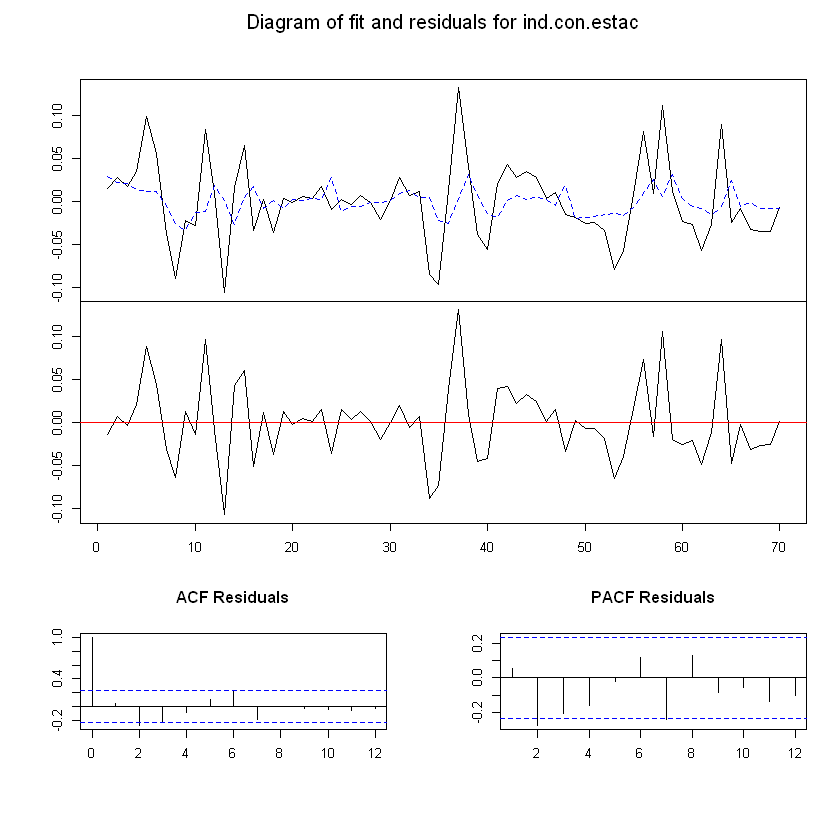

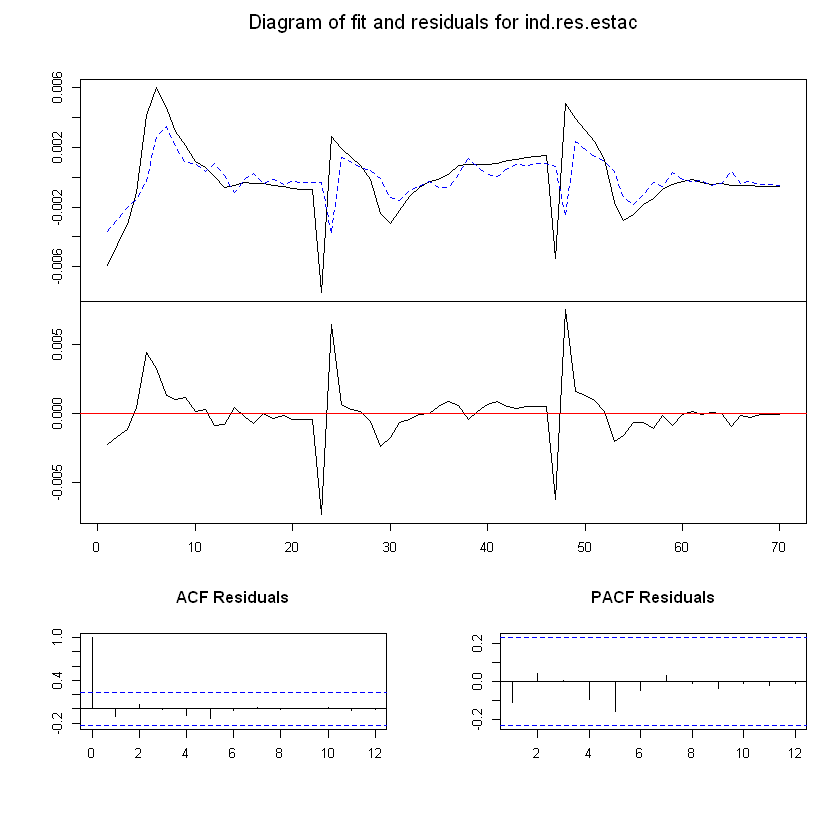

In [140]:
# plot residuals and their ACF and PACF
plot(var.1)
plot(var.1, names="ind.res.estac")



$ind.res.estac

	JB-Test (univariate)

data:  Residual of ind.res.estac equation
Chi-squared = 135.73, df = 2, p-value < 2.2e-16


$ind.con.estac

	JB-Test (univariate)

data:  Residual of ind.con.estac equation
Chi-squared = 5.8939, df = 2, p-value = 0.0525


$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var.1
Chi-squared = 140.94, df = 4, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var.1
Chi-squared = 3.793, df = 2, p-value = 0.1501


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var.1
Chi-squared = 137.15, df = 2, p-value < 2.2e-16


$jb.uni
$jb.uni$ind.res.estac

	JB-Test (univariate)

data:  Residual of ind.res.estac equation
Chi-squared = 135.73, df = 2, p-value < 2.2e-16


$jb.uni$ind.con.estac

	JB-Test (univariate)

data:  Residual of ind.con.estac equation
Chi-squared = 5.8939, df = 2, p-value = 0.0525



$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var.1


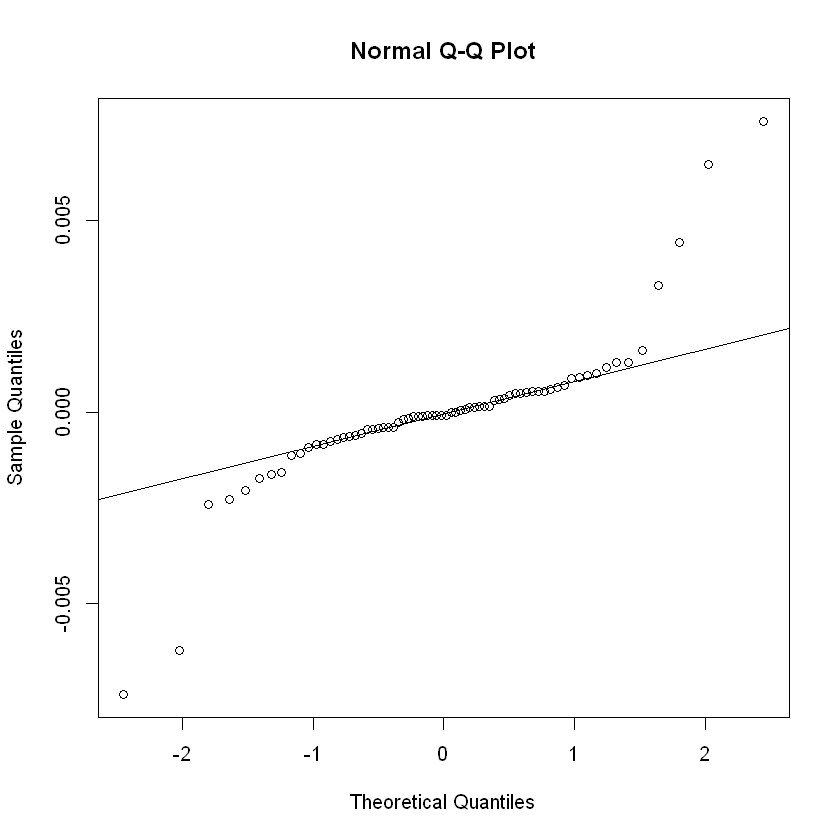

In [141]:
# QQ plot for residuals
#str(var.1)
# la hipótesis nula de disturbios normales
e.ind.res.estac <- var.1$varresult$ind.res.estac$residuals
qqnorm(e.ind.res.estac)
qqline(e.ind.res.estac)

# multivariate Jarque-Bera test
normality.test(var.1, multivariate.only=FALSE)

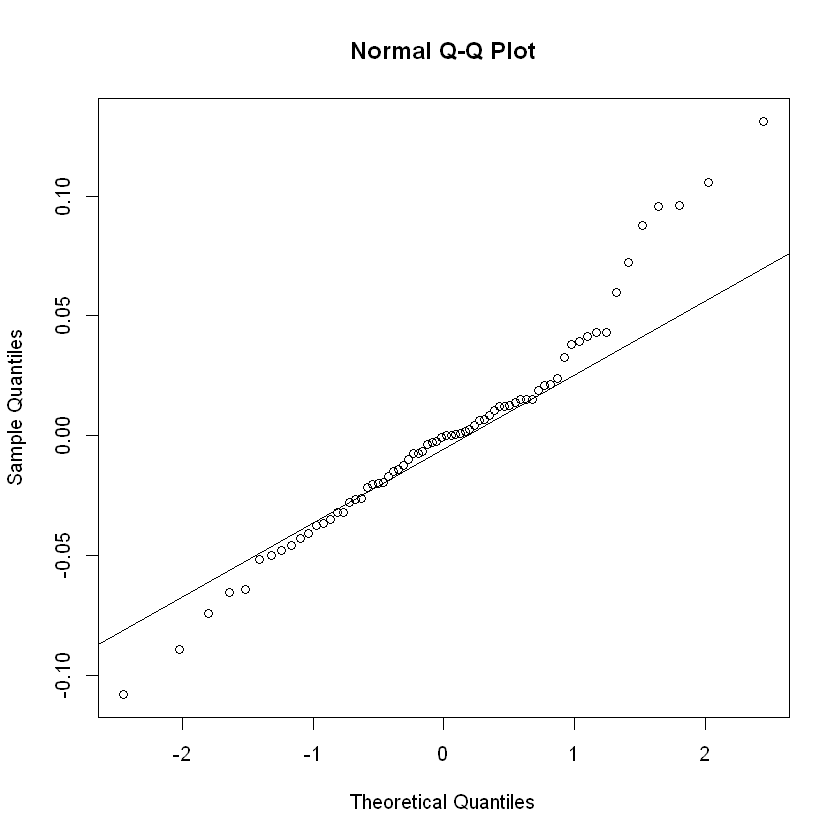

In [142]:
# QQ plot for residuals
#str(var.1)
e.ind.con.estac <- var.1$varresult$ind.con.estac$residuals
qqnorm(e.ind.con.estac)
qqline(e.ind.con.estac)


In [143]:
# La comprobación de la estabilidad no indica que nuestro modelo este mal.
roots(var.1)

[1] 0.3889789 0.3889789

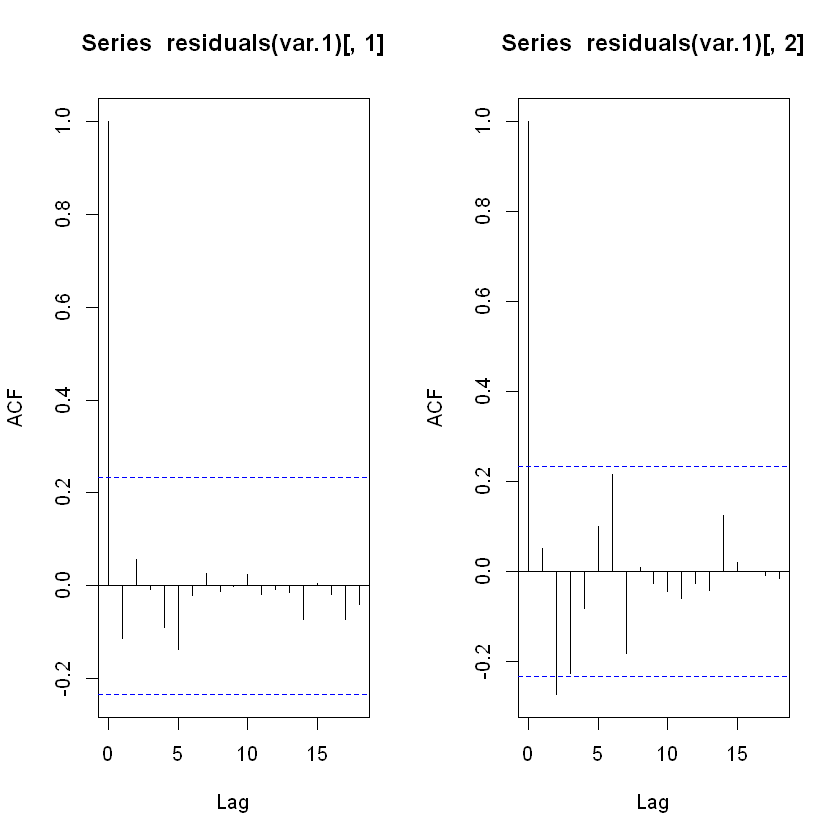

In [144]:
#Los gráficos muestran claramente la no presencia de correlación serial en los residuos.

par(mfrow=c(1, 2))
acf(residuals(var.1)[,1])
acf(residuals(var.1)[,2])

In [145]:
# Prueba Portmanteau Multivariada
# hipótesis nula de no autocorrelación
#Las pruebas confirman la no presencia de autocorrelación en los residuales.
serial.test(var.1,lags.pt=10)

serial.test(var.1,lags.bg=10)


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.1
Chi-squared = 29.946, df = 36, p-value = 0.7511

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.1
Chi-squared = 29.946, df = 36, p-value = 0.7511




	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.1
Chi-squared = 42.19, df = 60, p-value = 0.9607

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.1
Chi-squared = 42.19, df = 60, p-value = 0.9607



In [146]:
# Extract coefficients, standard errors etc. from the object
# produced by the VAR function
est_coefs <- coef(var.1)

# Extract only the coefficients for both dependend variables
# and combine them to a single matrix
est_coefs <- rbind(est_coefs[[1]][, 1], est_coefs[[2]][, 1]) 

# Print the rounded estimates in the console
round(est_coefs, 3)

ind.res.estac.l1,ind.con.estac.l1,const
0.499,0.007,0.000
-3.120,0.262,-0.001


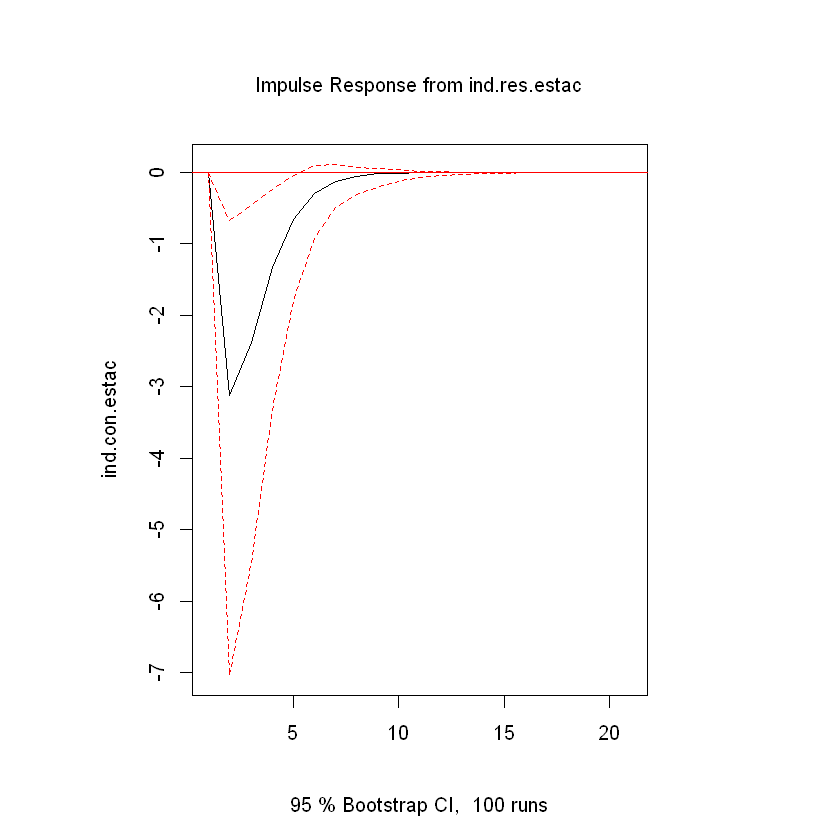

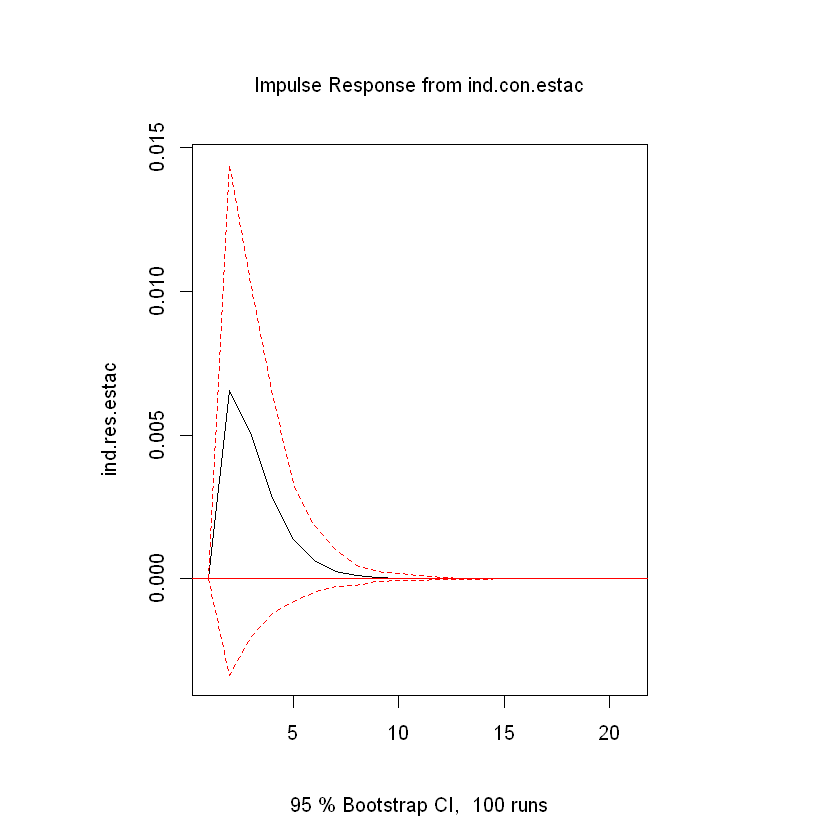

In [147]:
# Calculate the IRF
ir.1 <- irf(var.1, impulse = "ind.res.estac", response = "ind.con.estac", n.ahead = 20, ortho = FALSE)
ir.2 <- irf(var.1, impulse = "ind.con.estac", response = "ind.res.estac", n.ahead = 20, ortho = FALSE)

# Plot the IRF
par(mfrow=c(1, 2))
plot(ir.1)
plot(ir.2)

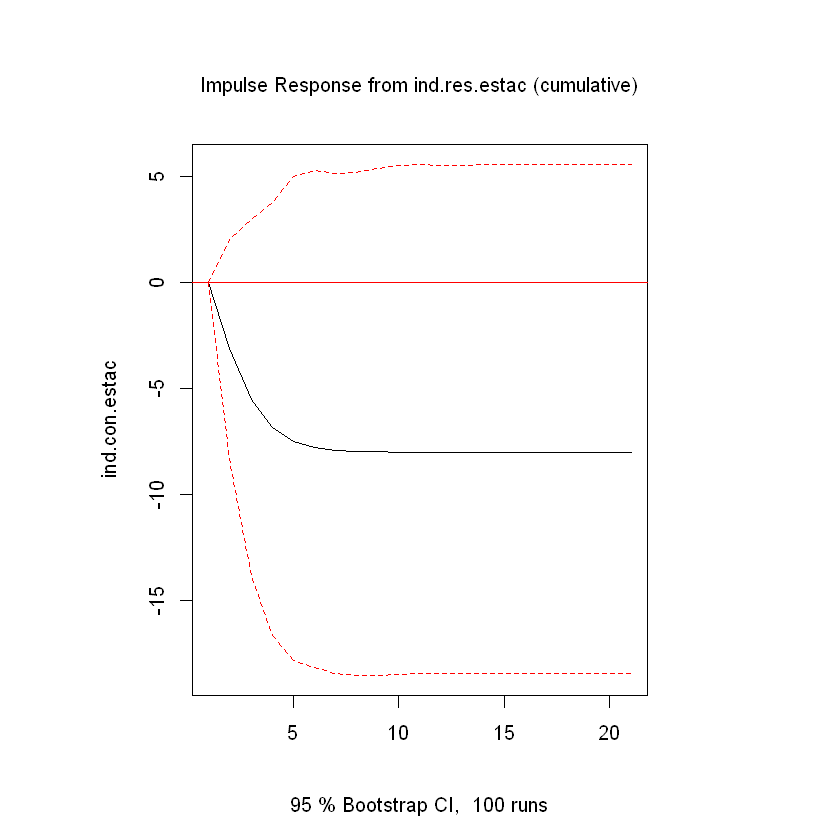

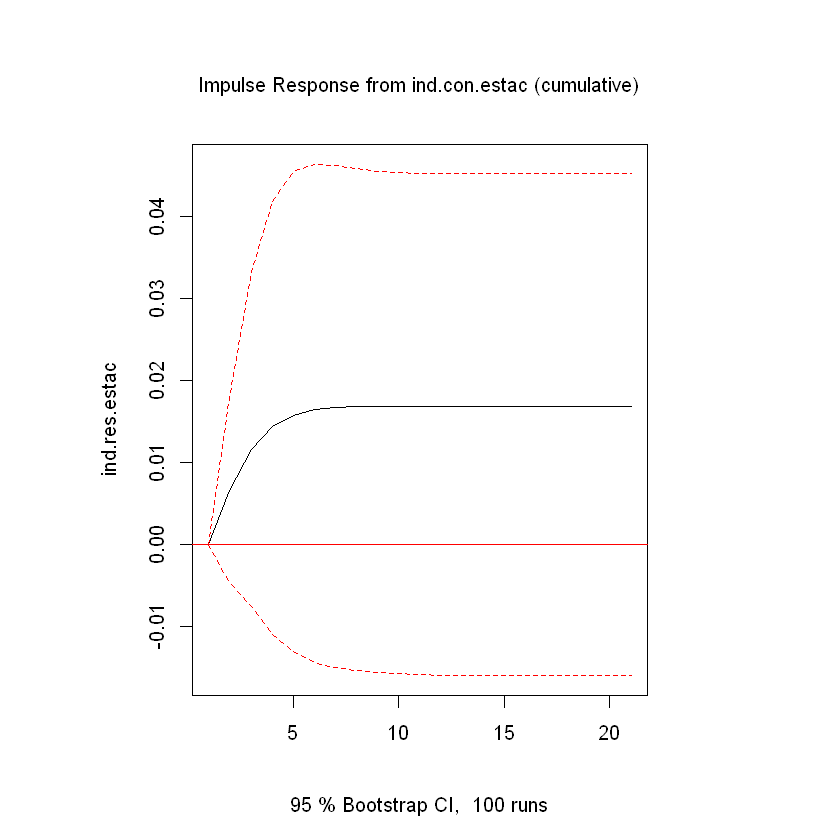

In [148]:
# Calculate impulse response
ir.3 <- irf(var.1, impulse = "ind.res.estac", response = "ind.con.estac", n.ahead = 20, ortho = FALSE,cumulative = TRUE)
ir.4 <- irf(var.1, impulse = "ind.con.estac", response = "ind.res.estac", n.ahead = 20, ortho = FALSE,cumulative = TRUE)


# Plot the IRF cummulate
par(mfrow=c(1, 2))
plot(ir.3)
plot(ir.4)

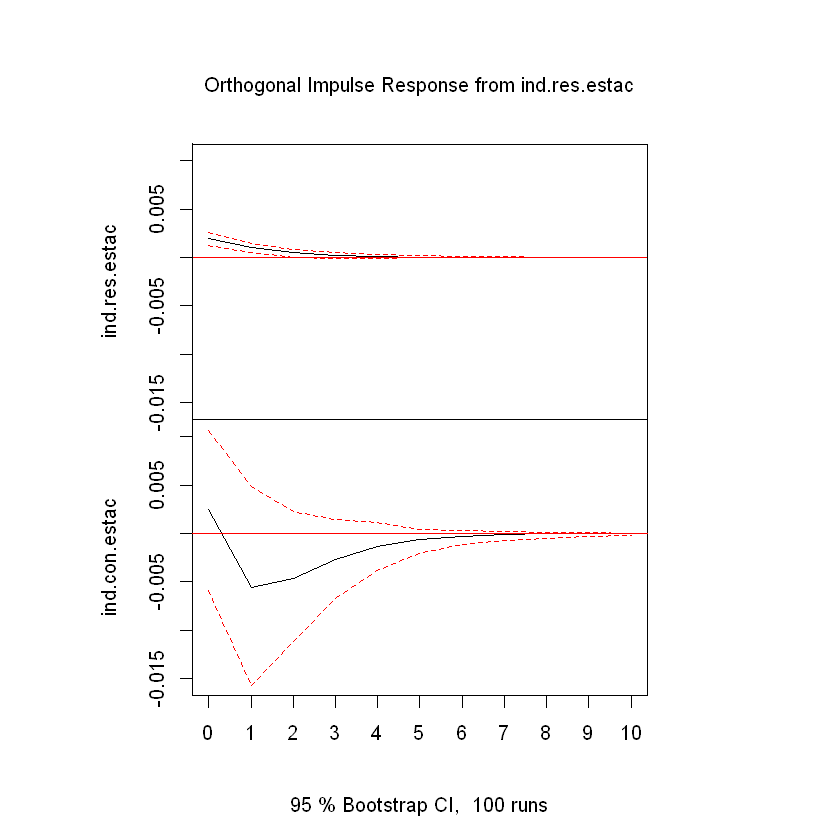

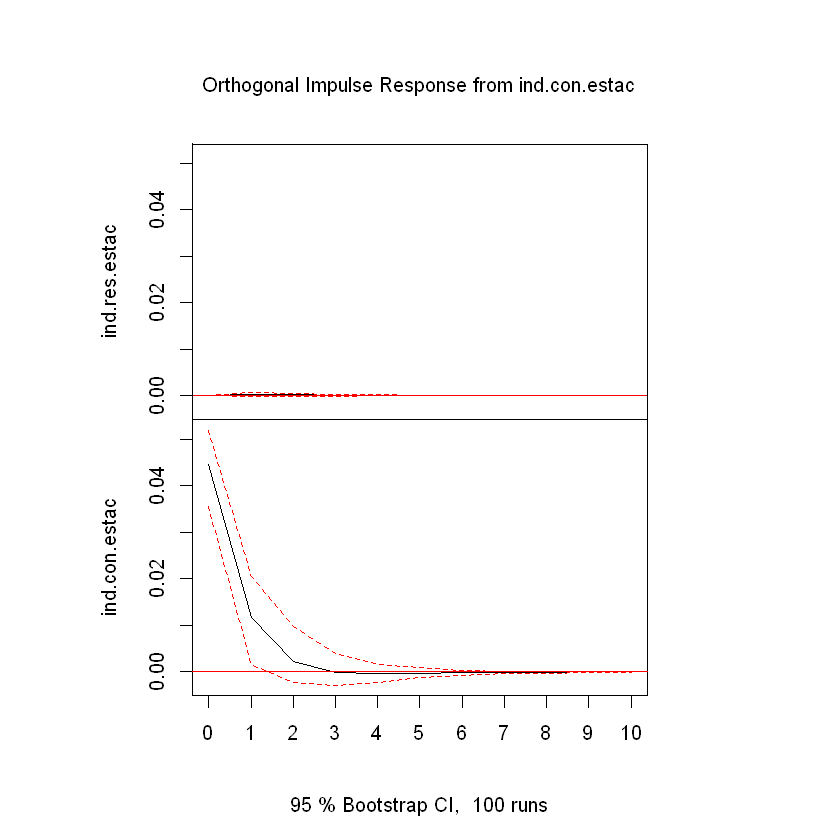

In [149]:
plot(irf(var.1))

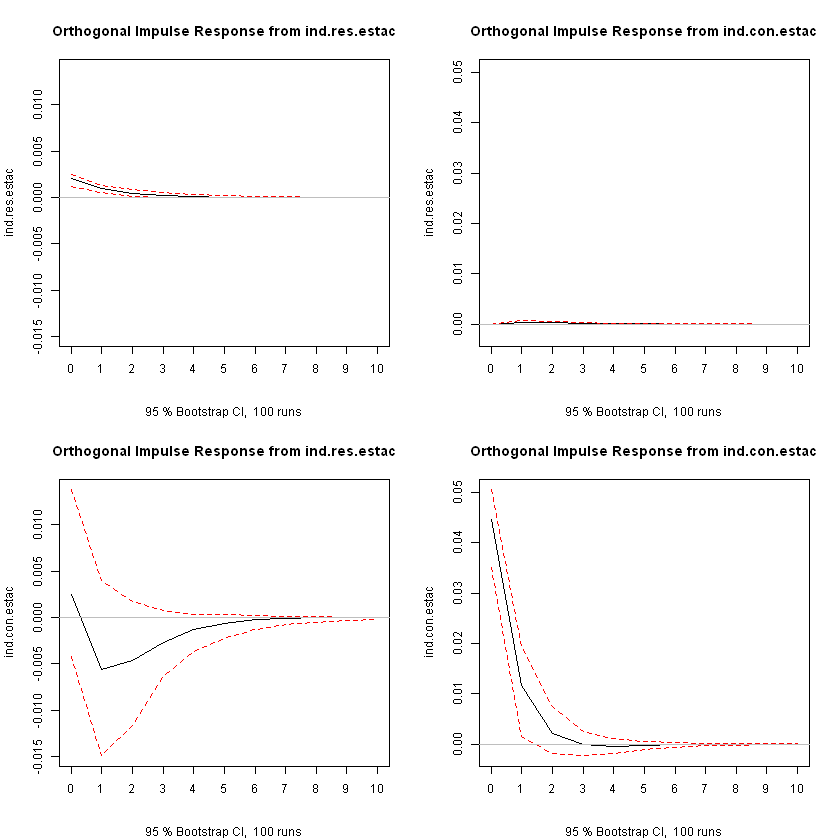

In [311]:
#y1-- res, y2--conc
y.Q.ord1 <- cbind(ind.res.estac, ind.con.estac)
y.Q.ord2 <- cbind(ind.con.estac, ind.res.estac)
# reduced form VAR(1)
var1.ord1 <- VAR(y.Q.ord1, p=1, type="const")
var1.ord2 <- VAR(y.Q.ord2, p=1, type="const")

# IRF based on Choleski decomposition of var(e)
var1.irfs.ord1 <- irf(var1.ord1, n.ahead=10)
var1.irfs.ord2 <- irf(var1.ord2, n.ahead=10)
par(mfcol=c(2,2), cex=0.6)
plot(var1.irfs.ord1, plot.type="single")
#plot(var1.irfs.ord2, plot.type="single")

# impulse="ind.res.estac", response="ind.res.estac" --- impulse="ind.con.estac", response="ind.res.estac"
# impulse="ind.res.estac", response="ind.con.estac" --- impulse="ind.con.estac", response="ind.con.estac"

In [320]:
jpeg(filename="var1.jpeg",   # Nombre del archivo y extension
     width = 20,    # Anchura
     height = 20,   # Altura
     res= 92,       # Resolucion 72ppi es un estandar
     units = "cm")  # Unidades.


aa = as.data.frame(irf(var.1,impulse="ind.res.estac", response="ind.con.estac")$irf)*100
aau = as.data.frame(irf(var.1,impulse="ind.res.estac", response="ind.con.estac")$Upper)*100
colnames(aau)<-c("upper")
aal= as.data.frame(irf(var.1,impulse="ind.res.estac", response="ind.con.estac")$Lower)*100
colnames(aal)<-c("lower")

x1 = as.data.frame(seq(1:11))
colnames(x1)<-c("ejex")
plot(x= x1$ejex,y=aa$ind.con.estac,type="l",ylim=c(-1.7,1.5),
     main="(a)Response of Concentration Index to Resilience Index", ylab="Concentration Index (%)",xlab="Periods \n95% Bootstrap CI")
abline(h = 0,col="red")
lines(x= x1$ejex,y=aau$upper,type="l",col="red",lwd=1,lty=2)
lines(x= x1$ejex,y=aal$lower,type="l",col="red",lwd=1,lty=2)

dev.off()



png 
  2

In [321]:
jpeg(filename="var2.jpeg",   # Nombre del archivo y extension
     width = 20,    # Anchura
     height = 20,   # Altura
     res= 92,       # Resolucion 72ppi es un estandar
     units = "cm")  # Unidades.

aa1 = as.data.frame(irf(var.1,impulse="ind.con.estac", response="ind.con.estac")$irf)*100
aau1 = as.data.frame(irf(var.1,impulse="ind.con.estac", response="ind.con.estac")$Upper)*100
colnames(aau1)<-c("upper")
aal1= as.data.frame(irf(var.1,impulse="ind.con.estac", response="ind.con.estac")$Lower)*100
colnames(aal1)<-c("lower")

x1 = as.data.frame(seq(1:11))
colnames(x1)<-c("ejex")
plot(x= x1$ejex,y=aa1$ind.con.estac,type="l",ylim=c(-0.5,4.5),
    main="(b)Response of Concentration Index to Concentration Index", ylab="Concentration Index (%)",xlab="Periods \n95% Bootstrap CI")
abline(h = 0,col="red")
lines(x= x1$ejex,y=aau1$upper,type="l",col="red",lwd=1,lty=2)
lines(x= x1$ejex,y=aal1$lower,type="l",col="red",lwd=1,lty=2)


dev.off()

png 
  2

In [322]:
jpeg(filename="var3.jpeg",   # Nombre del archivo y extension
     width = 20,    # Anchura
     height = 20,   # Altura
     res= 92,       # Resolucion 72ppi es un estandar
     units = "cm")  # Unidades.


aa11 = round(as.data.frame(irf(var.1,impulse="ind.res.estac", response="ind.res.estac")$irf),15)*100
aau11 = as.data.frame(irf(var.1,impulse="ind.res.estac", response="ind.res.estac")$Upper)*100
colnames(aau11)<-c("upper")
aal11= as.data.frame(irf(var.1,impulse="ind.res.estac", response="ind.res.estac")$Lower)*100
colnames(aal11)<-c("lower")

x1 = as.data.frame(seq(1:11))
colnames(x1)<-c("ejex")
plot(x= x1$ejex,y=aa11$ind.res.estac,type="l",ylim=c(-0.05,0.3),
    main="(c)Response of Resilience Index to Resilience Index", ylab="Resilience Index (%)",xlab="Periods \n95% Bootstrap CI")
abline(h = 0,col="red")
lines(x= x1$ejex,y=aau11$upper,type="l",col="red",lwd=1,lty=2)
lines(x= x1$ejex,y=aal11$lower,type="l",col="red",lwd=1,lty=2)


dev.off()

png 
  2

In [323]:
jpeg(filename="var4.jpeg",   # Nombre del archivo y extension
     width = 20,    # Anchura
     height = 20,   # Altura
     res= 92,       # Resolucion 72ppi es un estandar
     units = "cm")  # Unidades.

aa110 = round(as.data.frame(irf(var.1,impulse="ind.con.estac", response="ind.res.estac",ortho=TRUE)$irf),15)*100
aau110 = as.data.frame(irf(var.1,impulse="ind.con.estac", response="ind.res.estac")$Upper)*100
colnames(aau110)<-c("upper")
aal110= as.data.frame(irf(var.1,impulse="ind.con.estac", response="ind.res.estac")$Lower)*100
colnames(aal110)<-c("lower")

x1 = as.data.frame(seq(1:11))
colnames(x1)<-c("ejex")
plot(x= x1$ejex,y=aa110$ind.res.estac,type="l",ylim=c(-0.025,0.09),
    main="(d)Response of Resilience Index to Concentration Index", ylab="Resilience Index (%)",xlab="Periods \n95% Bootstrap CI")
abline(h = 0,col="red")
lines(x= x1$ejex,y=aau110$upper,type="l",col="red",lwd=1,lty=2)
lines(x= x1$ejex,y=aal110$lower,type="l",col="red",lwd=1,lty=2)

dev.off()

png 
  2

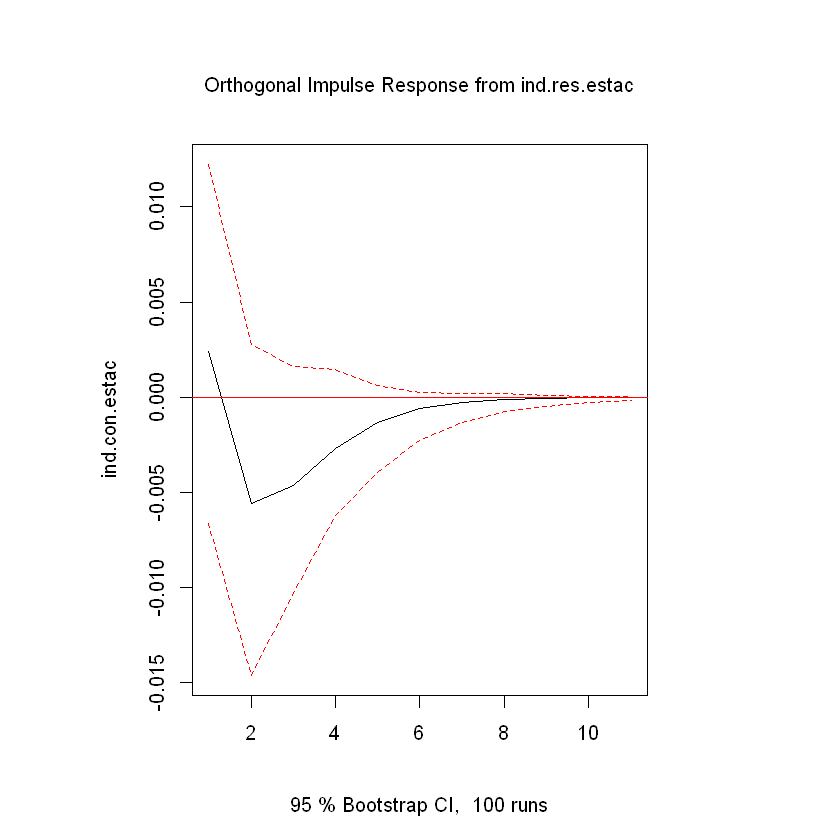

In [309]:
plot(irf(var.1,impulse="ind.res.estac", response="ind.con.estac"))


In [318]:
jpeg(filename="varx.jpeg",   # Nombre del archivo y extension
     width = 30,    # Anchura
     height = 30,   # Altura
     res= 92,       # Resolucion 72ppi es un estandar
     units = "cm")  # Unidades.


par(mfrow=c(2, 1))

plot(irf(var.1,impulse="ind.res.estac", response="ind.res.estac", n.ahead=12),
     main="Response of Resilience Index to Concentration Index", ylab="Resilience Index")

plot(irf(var.1,impulse="ind.con.estac", response="ind.res.estac", n.ahead=12),
     main="Response of Resilience Index to Concentration Index", ylab="Resilience Index")

dev.off()

png 
  2

In [319]:
#Ahora ejecutamos las pruebas de causalidad de Granger para ambas variables.
# Granger causality
causality(var.1, cause="ind.res.estac")

causality(var.1, cause="ind.con.estac")

$Granger

	Granger causality H0: ind.res.estac do not Granger-cause ind.con.estac

data:  VAR object var.1
F-Test = 2.1371, df1 = 1, df2 = 134, p-value = 0.1461


$Instant

	H0: No instantaneous causality between: ind.res.estac and
	ind.con.estac

data:  VAR object var.1
Chi-squared = 0.20627, df = 1, p-value = 0.6497



$Granger

	Granger causality H0: ind.con.estac do not Granger-cause ind.res.estac

data:  VAR object var.1
F-Test = 1.599, df1 = 1, df2 = 134, p-value = 0.2082


$Instant

	H0: No instantaneous causality between: ind.con.estac and
	ind.res.estac

data:  VAR object var.1
Chi-squared = 0.20627, df = 1, p-value = 0.6497



In [43]:
#library(tidyverse)
#install.packages("lubridate")
#library(lubridate)